In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Feature Descriptions

- **PAY_0**: Repayment status in **September 2005**  
  - `-1 = pay duly`  
  - `1 = payment delay for one month`  
  - `2 = payment delay for two months`  
  - `...`  
  - `8 = payment delay for eight months`  
  - `9 = payment delay for nine months and above`

- **PAY_2**: Repayment status in **August 2005** (same scale as above)  
- **PAY_3**: Repayment status in **July 2005** (same scale as above)  
- **PAY_4**: Repayment status in **June 2005** (same scale as above)  
- **PAY_5**: Repayment status in **May 2005** (same scale as above)  
- **PAY_6**: Repayment status in **April 2005** (same scale as above)  

---

- **BILL_AMT1**: Amount of bill statement in **September 2005 (NT$)**  
- **BILL_AMT2**: Amount of bill statement in **August 2005 (NT$)**  
- **BILL_AMT3**: Amount of bill statement in **July 2005 (NT$)**  
- **BILL_AMT4**: Amount of bill statement in **June 2005 (NT$)**  
- **BILL_AMT5**: Amount of bill statement in **May 2005 (NT$)**  
- **BILL_AMT6**: Amount of bill statement in **April 2005 (NT$)**  

---

- **PAY_AMT1**: Amount of previous payment in **September 2005 (NT$)**  
- **PAY_AMT2**: Amount of previous payment in **August 2005 (NT$)**  
- **PAY_AMT3**: Amount of previous payment in **July 2005 (NT$)**  
- **PAY_AMT4**: Amount of previous payment in **June 2005 (NT$)**  
- **PAY_AMT6**: Amount of previous payment in **April 2005 (NT$)**  


In [3]:
df = pd.read_csv("Credit Card Defaulter Prediction.csv", index_col = 'ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,F,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Y
2,120000,F,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
3,90000,F,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
4,50000,F,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
5,50000,M,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [4]:
df.shape

(30000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  int64 

In [6]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [7]:
df.duplicated().sum()

35

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(29965, 24)

In [11]:
df['SEX'].value_counts()

SEX
F    18091
M    11874
Name: count, dtype: int64

In [10]:
df.columns.tolist()

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default ']

In [11]:
# renaming the targey column to remove extra space
df.rename(columns={'default ': 'default'}, inplace=True)

In [12]:
df['SEX'].unique()

array(['F', 'M'], dtype=object)

In [13]:
df['EDUCATION'].unique()

array(['University', 'Graduate school', 'High School', 'Unknown',
       'Others', '0'], dtype=object)

In [14]:
df['MARRIAGE'].unique()

array(['Married', 'Single', 'Other', '0'], dtype=object)

In [15]:
df['EDUCATION'] = df['EDUCATION'].replace('0', np.nan)
df['MARRIAGE'] = df['MARRIAGE'].replace('0', np.nan)

In [16]:
df['EDUCATION'].unique()

array(['University', 'Graduate school', 'High School', 'Unknown',
       'Others', nan], dtype=object)

In [17]:
df['MARRIAGE'].unique()

array(['Married', 'Single', 'Other', nan], dtype=object)

In [18]:
df[['EDUCATION', 'MARRIAGE']].isnull().sum()

EDUCATION    14
MARRIAGE     54
dtype: int64

In [19]:
df['EDUCATION'] = df['EDUCATION'].fillna('Other')
df['MARRIAGE'] = df['MARRIAGE'].fillna('Other')

In [20]:
df['EDUCATION'].replace({'Others':'Other', 'Unknown':'Other'},inplace = True)

In [21]:
df[['EDUCATION', 'MARRIAGE']].isnull().sum()

EDUCATION    0
MARRIAGE     0
dtype: int64

In [22]:
df[['EDUCATION']].value_counts()

EDUCATION      
University         14019
Graduate school    10563
High School         4915
Other                468
Name: count, dtype: int64

In [23]:
df[['MARRIAGE']].value_counts()

MARRIAGE
Single      15945
Married     13643
Other         377
Name: count, dtype: int64

In [24]:
df[['EDUCATION', 'MARRIAGE']].mode()

,EDUCATION,MARRIAGE
0,University,Single


In [25]:
df['EDUCATION'] = df['EDUCATION'].replace('Other', df['EDUCATION'].mode()[0])
df['MARRIAGE'] = df['MARRIAGE'].replace('Other', df['MARRIAGE'].mode()[0])

In [26]:
df[['EDUCATION']].value_counts()

EDUCATION      
University         14487
Graduate school    10563
High School         4915
Name: count, dtype: int64

In [27]:
df[['MARRIAGE']].value_counts()

MARRIAGE
Single      16322
Married     13643
Name: count, dtype: int64

In [28]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,F,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Y
2,120000,F,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
3,90000,F,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
4,50000,F,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
5,50000,M,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [29]:
df['default'].value_counts()

default
N    23335
Y     6630
Name: count, dtype: int64

In [30]:
df['default'] = df['default'].map({'N': 0, 'Y': 1})

In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
label_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

In [32]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,2,0,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,2,1,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,2,1,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,2,0,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,0,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [33]:
#univariate Analysis

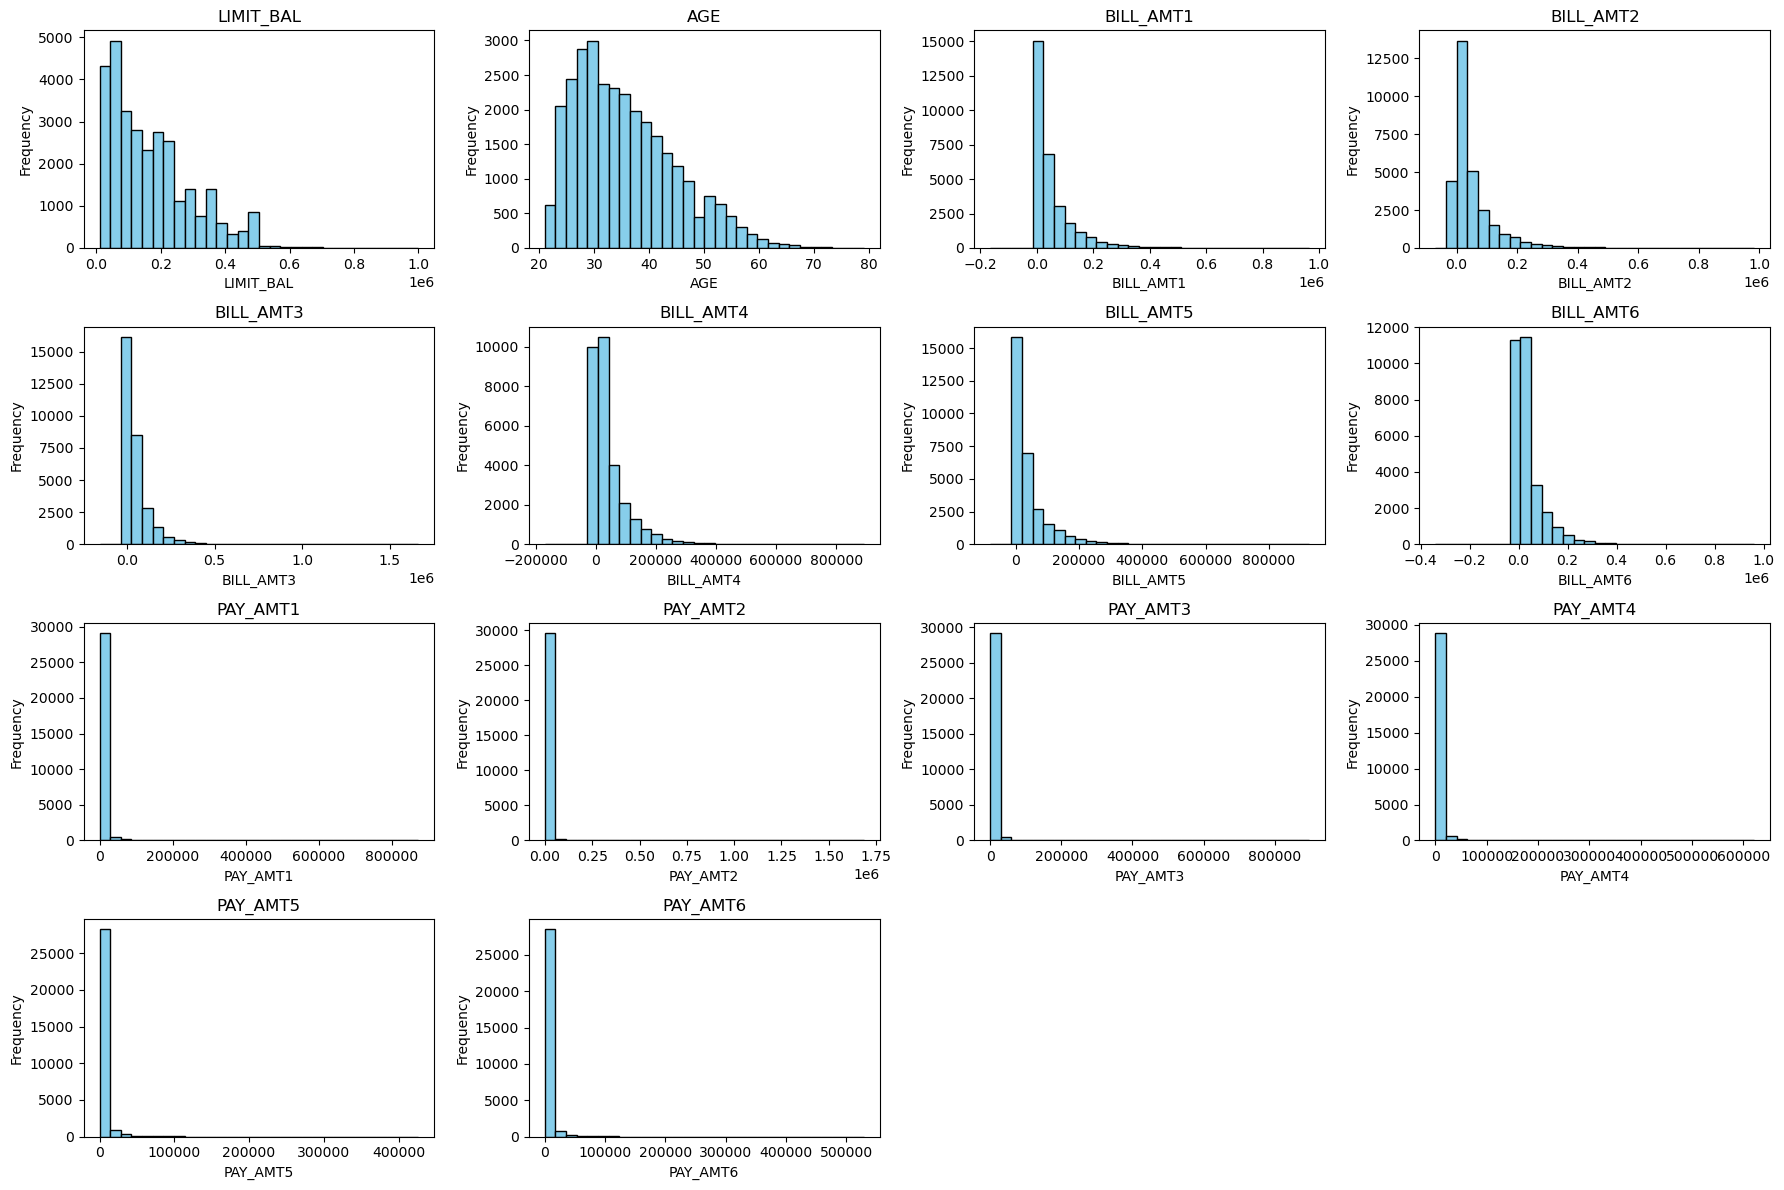

In [34]:
import matplotlib.pyplot as plt

num_cols = ['LIMIT_BAL', 'AGE'] + \
           [col for col in df.columns if 'BILL_AMT' in col] + \
           [col for col in df.columns if 'PAY_AMT' in col]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', color='skyblue')
    axes[i].set_title(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

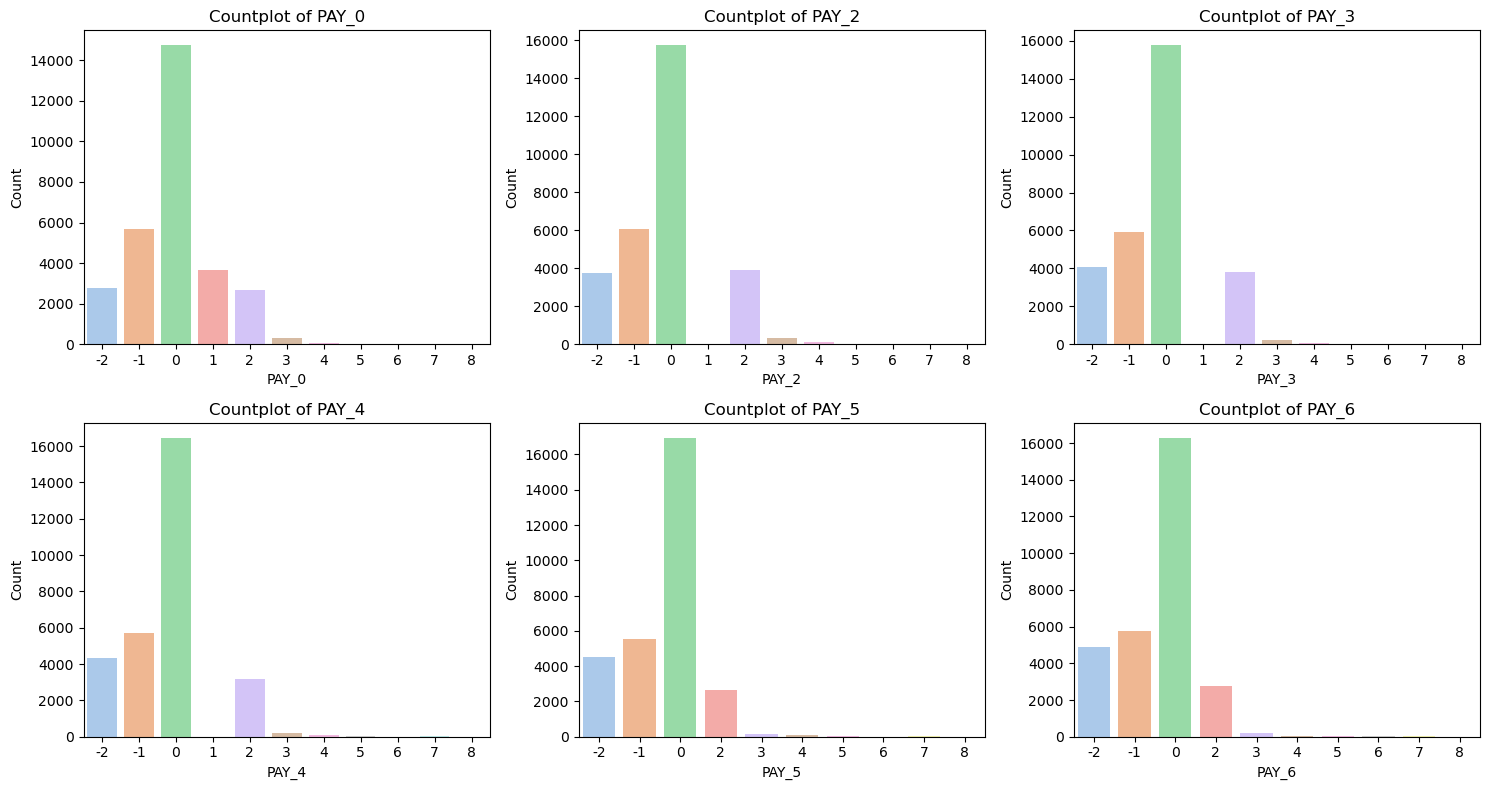

In [35]:
# List of payment status columns
payment_status_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Create subplots for payment status columns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(payment_status_cols):
    sns.countplot(x=df[col], ax=axes[i], palette="pastel")
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

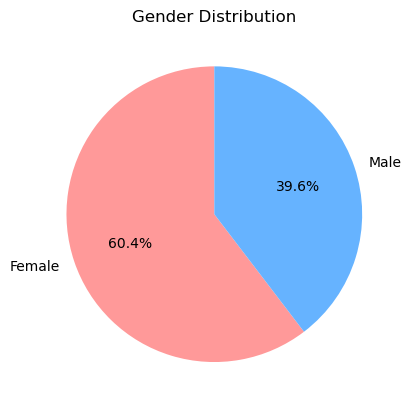

In [15]:
df['SEX'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Female', 'Male'], colors=['#ff9999', '#66b3ff'])
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

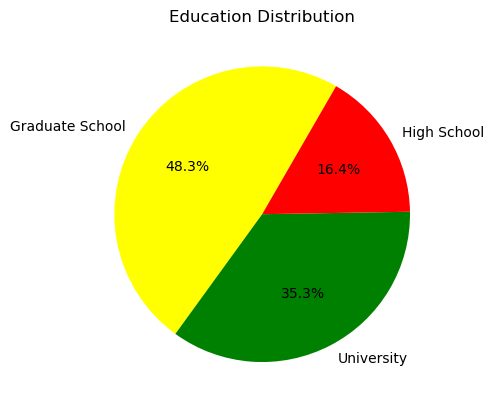

In [37]:
df['EDUCATION'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60, labels=['Graduate School', 'University', 'High School'], colors=['yellow', 'g', 'r'])
plt.ylabel('')
plt.title('Education Distribution')
plt.show()

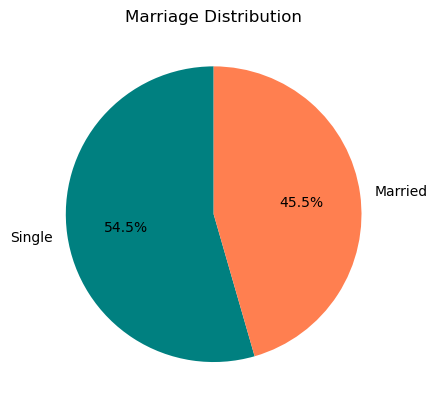

In [38]:
df['MARRIAGE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Single', 'Married'], colors=['teal', 'coral'])
plt.ylabel('')
plt.title('Marriage Distribution')
plt.show()

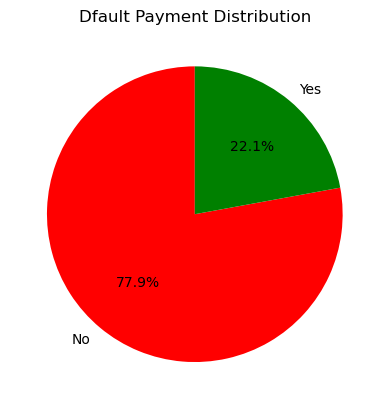

In [39]:
df['default'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'], colors=['r', 'g'])
plt.ylabel('')
plt.title('Dfault Payment Distribution')
plt.show()

In [40]:
#bivariate 

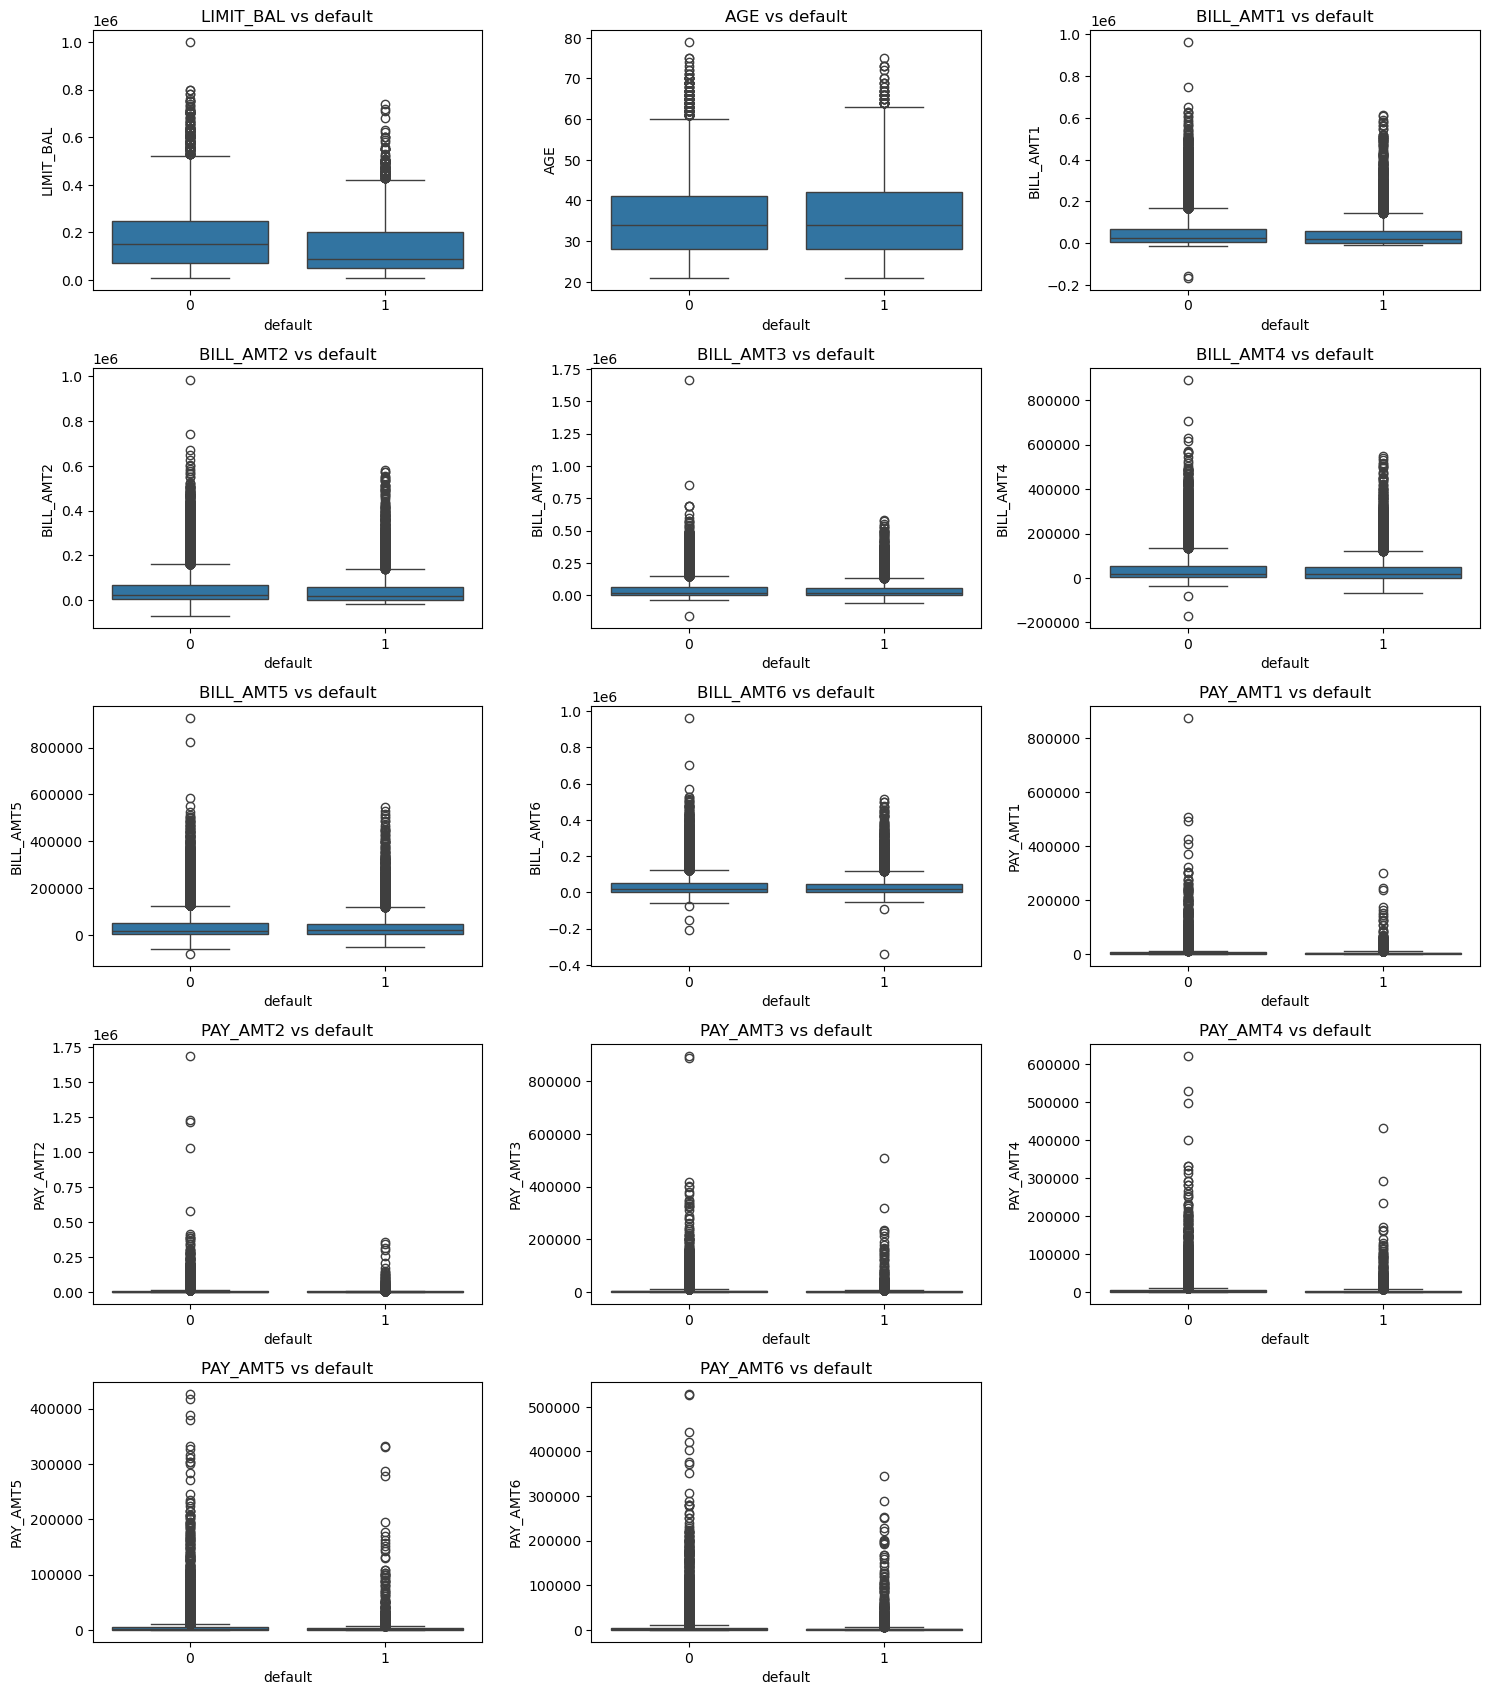

In [41]:
# Numerical features
target = 'default'

num_features = ['LIMIT_BAL', 'AGE', 
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(15, 20))
for i, col in enumerate(num_features, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} vs {target}")
plt.tight_layout()
plt.show()

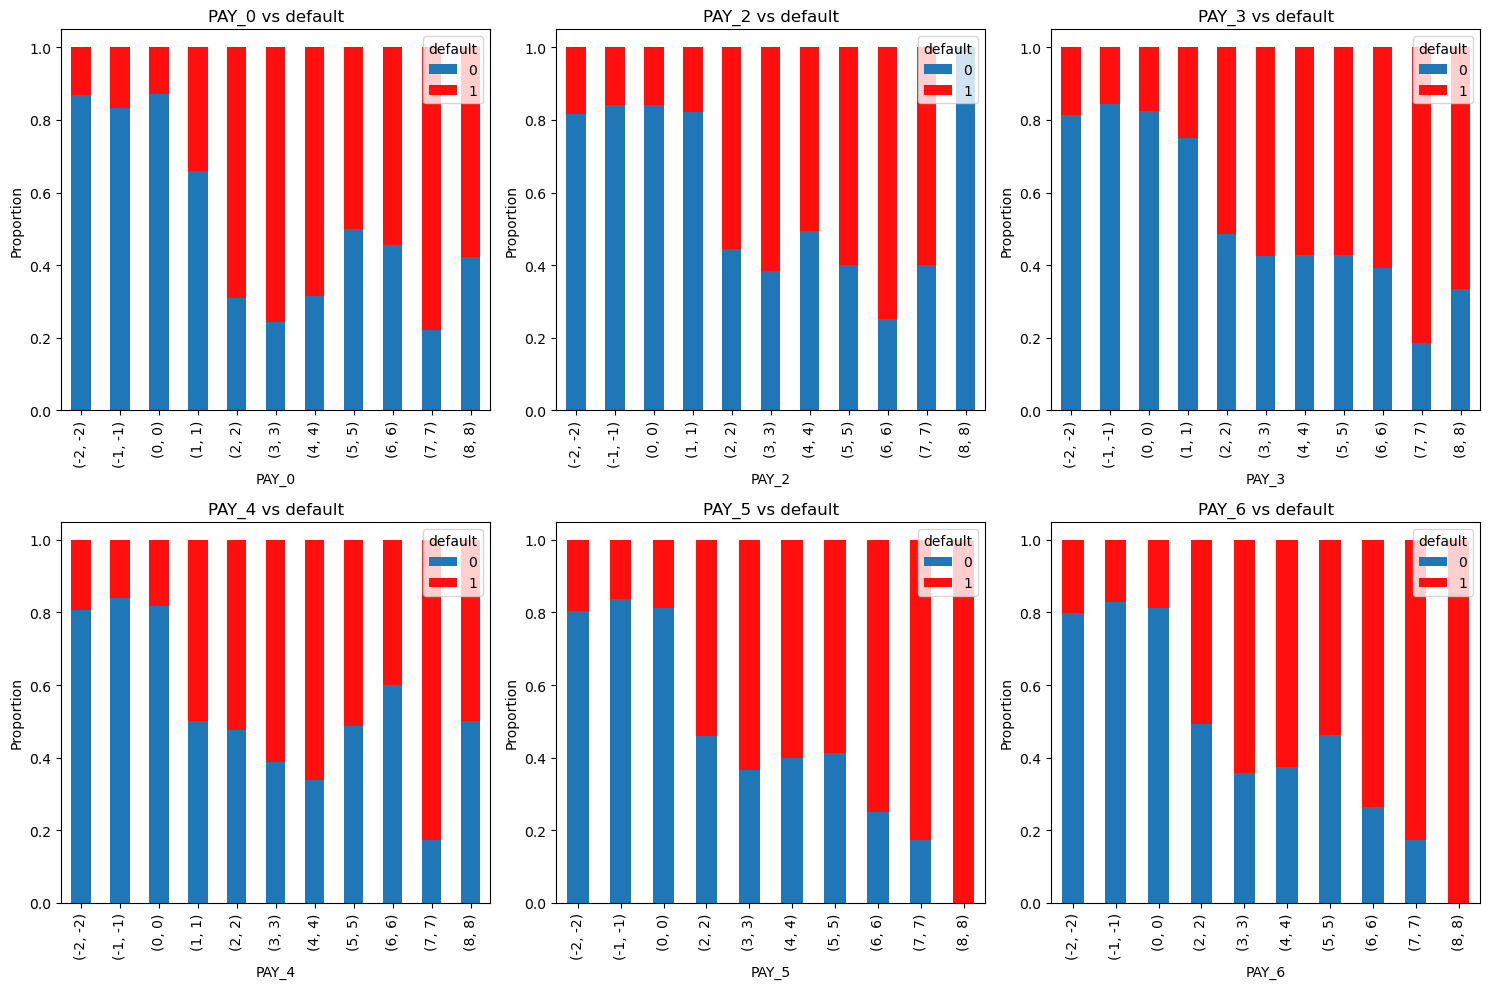

In [42]:
# Categorical features (PAY_0 to PAY_6)
cat_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    prop_df = (df.groupby([col, target]).size()
               .groupby(level=0).apply(lambda x: x / x.sum())
               .unstack())
    prop_df.plot(kind='bar', stacked=True, ax=plt.gca(), color = ['#1f77b7', '#ff0f0e'] )
    plt.title(f"{col} vs {target}")
    plt.ylabel("Proportion")
    plt.xlabel(f"{col}")
plt.tight_layout()
plt.show()

In [43]:
corr = df.corr()
target_corr = corr[target].sort_values(ascending=False)
print("Top correlations with target:\n", target_corr)

Top correlations with target:
 default      1.000000
PAY_0        0.324964
PAY_2        0.263656
PAY_3        0.235230
PAY_4        0.216551
PAY_5        0.204059
PAY_6        0.186740
EDUCATION    0.040939
SEX          0.039742
AGE          0.013619
BILL_AMT6   -0.005469
BILL_AMT5   -0.006859
BILL_AMT4   -0.010259
BILL_AMT3   -0.014182
BILL_AMT2   -0.014302
BILL_AMT1   -0.019758
MARRIAGE    -0.029443
PAY_AMT6    -0.053250
PAY_AMT5    -0.055194
PAY_AMT3    -0.056319
PAY_AMT4    -0.056898
PAY_AMT2    -0.058643
PAY_AMT1    -0.073015
LIMIT_BAL   -0.153871
Name: default, dtype: float64


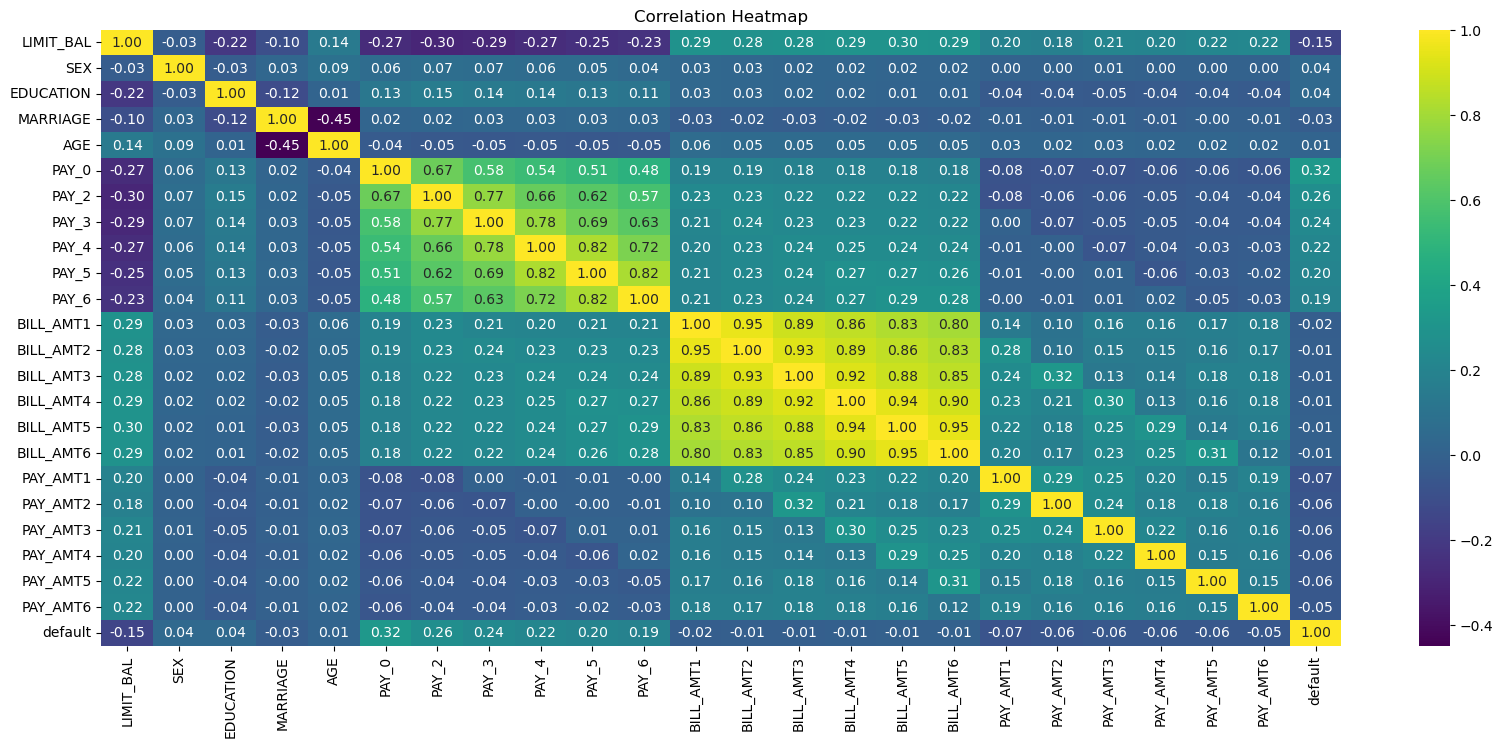

In [44]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

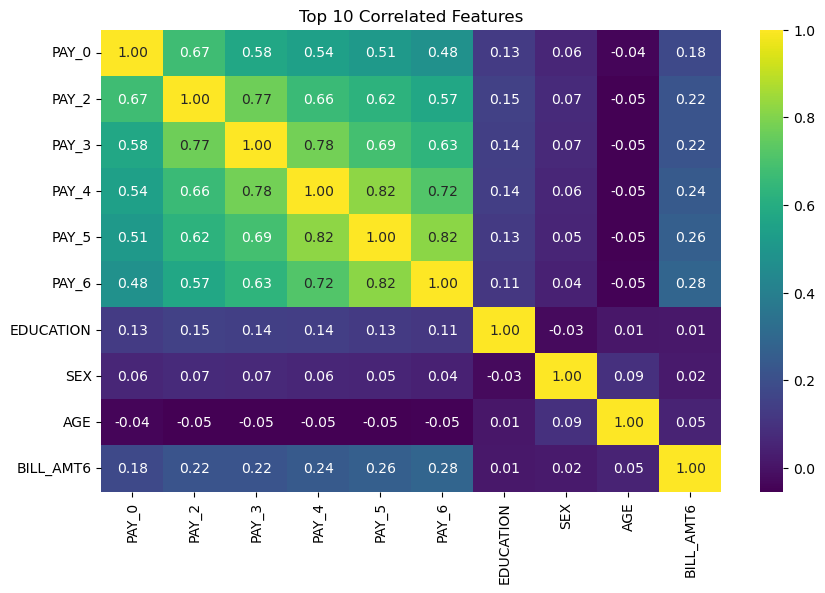

In [45]:
# Focused heatmap: Top 10 correlated features
top_features = target_corr.index[1:11]
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_features].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Top 10 Correlated Features")
plt.xticks(rotation = 90)
plt.show()

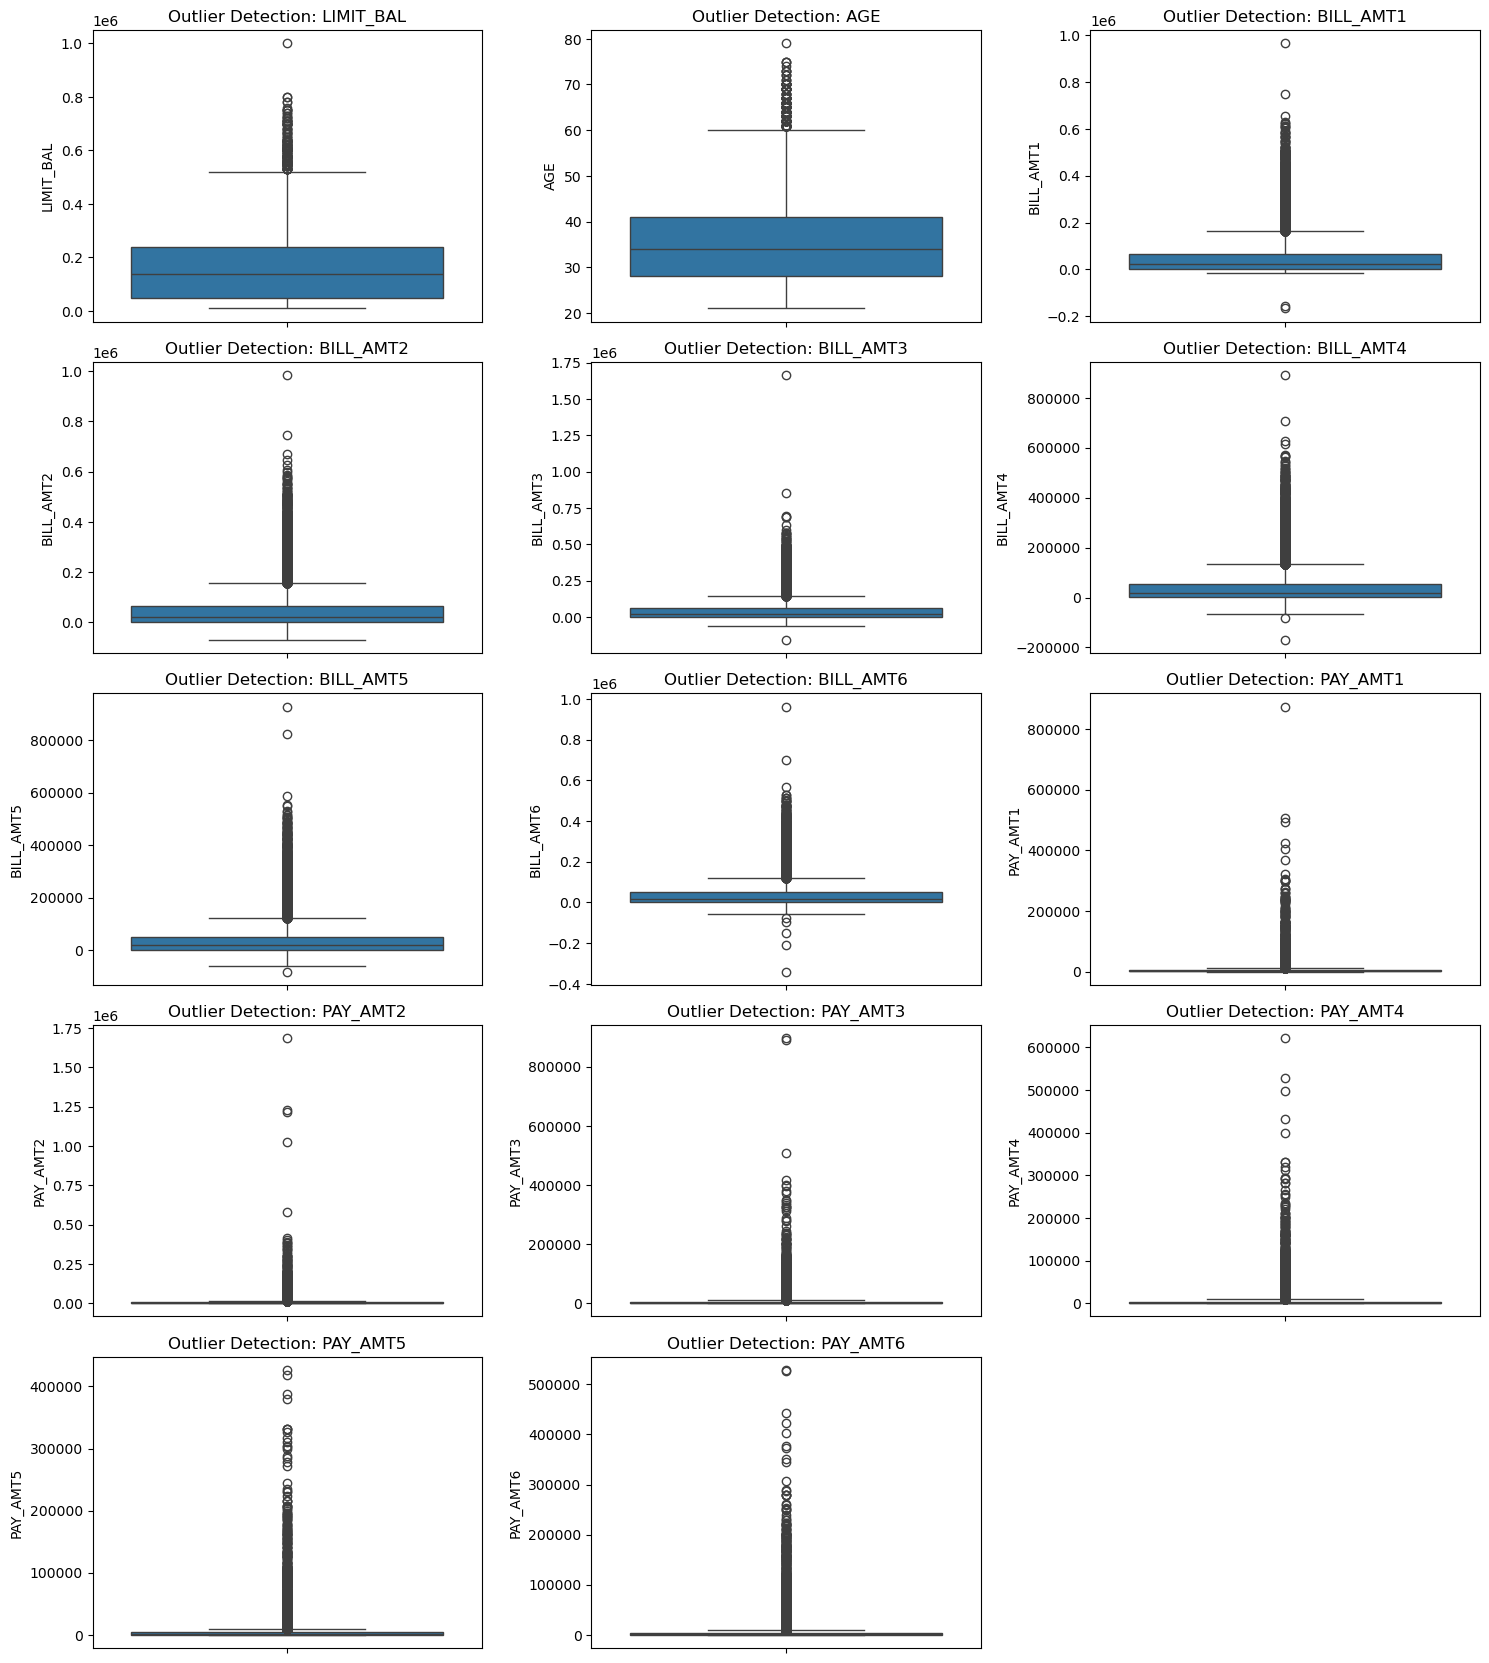

In [46]:
# Boxplots for outlier detection
outlier_cols = ['LIMIT_BAL', 'AGE',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize=(15, 20))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Outlier Detection: {col}")
plt.tight_layout()
plt.show()

In [47]:
# Checking extreme values in AGE
print("AGE statistics:\n", df['AGE'].describe())

AGE statistics:
 count    29965.000000
mean        35.487969
std          9.219459
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


In [48]:
# Checking unusual payment status values
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    print(f"{col} unique values:", sorted(df[col].unique()))

PAY_0 unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2 unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3 unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4 unique values: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5 unique values: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6 unique values: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


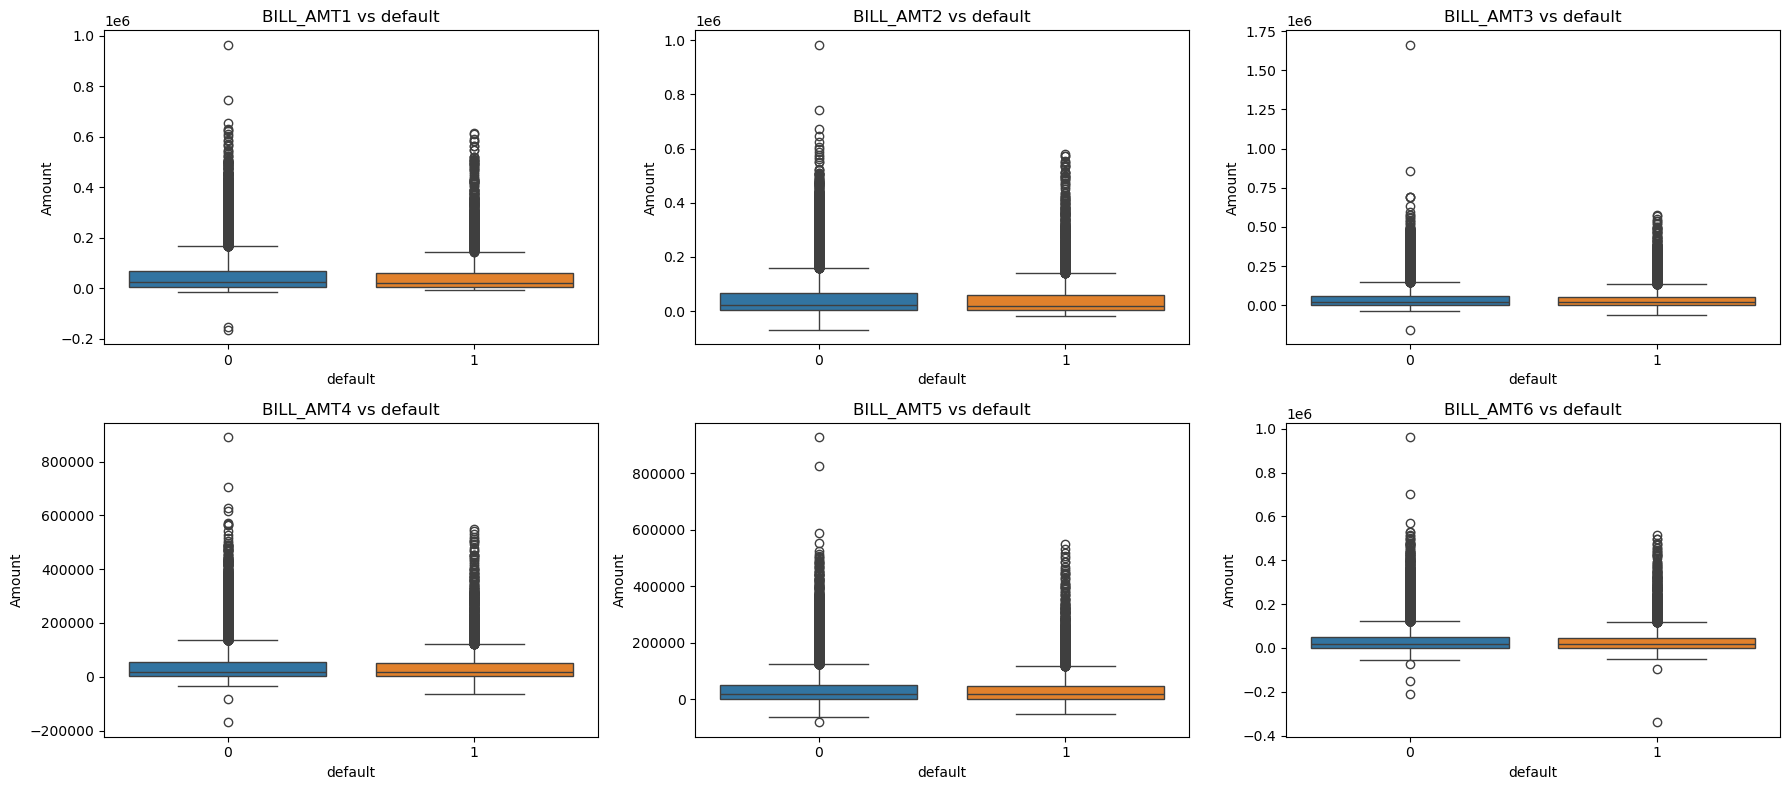

In [49]:
bill_features = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_features  = [f'PAY_AMT{i}' for i in range(1, 7)]

# Boxplots for Bill Amounts
plt.figure(figsize=(18, 8))
for i, col in enumerate(bill_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=target, y=col, palette=['#1f77b4', '#ff7f0e'])
    plt.title(f"{col} vs {target}")
    plt.ylabel("Amount")
    plt.xlabel(target)
plt.tight_layout()
plt.show()

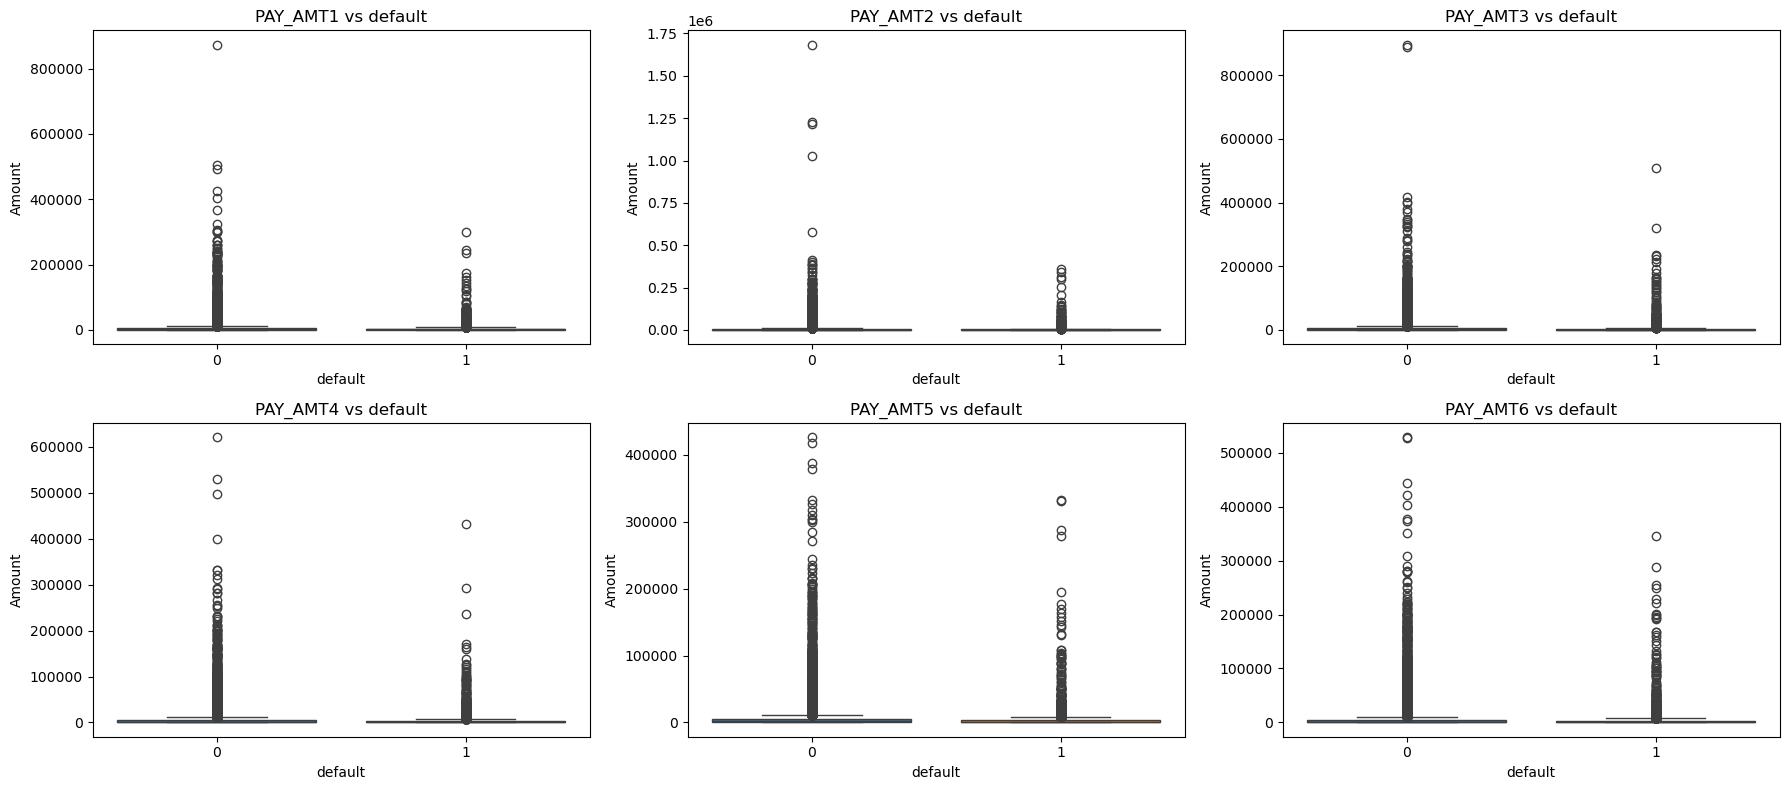

In [50]:
# Boxplots for Pay Amounts
pay_features  = [f'PAY_AMT{i}' for i in range(1, 7)]

plt.figure(figsize=(18, 8))
for i, col in enumerate(pay_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=target, y=col, palette=['#1f77b4', '#ff7f0e'])
    plt.title(f"{col} vs {target}")
    plt.ylabel("Amount")
    plt.xlabel(target)
plt.tight_layout()
plt.show()

checking multicollinearity using Variance Inflation Factor (VIF)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop('default', axis = 1)

x_encoded = pd.get_dummies(x, drop_first = True)

vifdata = pd.DataFrame()
vifdata['Feature'] = x_encoded.columns
vifdata['VIF'] = [variance_inflation_factor(x_encoded.values, i) for i in range(x_encoded.shape[1])]

print(vifdata.sort_values(by = 'VIF', ascending = False))

      Feature        VIF
12  BILL_AMT2  38.214341
15  BILL_AMT5  35.990486
13  BILL_AMT3  31.781004
14  BILL_AMT4  29.548536
16  BILL_AMT6  21.430088
11  BILL_AMT1  20.818638
4         AGE   5.497787
9       PAY_5   4.968511
8       PAY_4   4.425723
0   LIMIT_BAL   3.921381
7       PAY_3   3.716398
10      PAY_6   3.451635
6       PAY_2   3.209472
2   EDUCATION   2.479315
18   PAY_AMT2   2.384842
5       PAY_0   1.925481
19   PAY_AMT3   1.911501
17   PAY_AMT1   1.907405
21   PAY_AMT5   1.854386
20   PAY_AMT4   1.805073
3    MARRIAGE   1.753068
1         SEX   1.692281
22   PAY_AMT6   1.270724


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
x = df.drop('default', axis = 1)
y = df['default']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

print('Train Shape:', x_train.shape)
print('Test Shape:', x_test. shape)

Train Shape: (23972, 23)
Test Shape: (5993, 23)


In [54]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [56]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", random_state=42)
}

In [57]:
results = {}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)   
    y_pred = model.predict(x_test_scaled)  
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n🔹{name}")
    print("Accuracy:", round(acc, 4))
    print('-----------------------------------------------------')
    print(classification_report(y_test, y_pred))
    print('-----------------------------------------------------')


🔹Logistic Regression
Accuracy: 0.8148
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4667
           1       0.73      0.26      0.38      1326

    accuracy                           0.81      5993
   macro avg       0.78      0.61      0.64      5993
weighted avg       0.80      0.81      0.78      5993

-----------------------------------------------------

🔹KNN
Accuracy: 0.7906
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4667
           1       0.54      0.35      0.43      1326

    accuracy                           0.79      5993
   macro avg       0.69      0.63      0.65      5993
weighted avg       0.77      0.79      0.77      5993

-----------------------------------------------------

🔹Decision Tree
Accuracy: 0.7143
-----------------------------------

## Understanding Random Forest in Credit Card Default Prediction  

Random Forest is an ensemble method that builds multiple decision trees and combines their outputs.  
In the context of credit card default prediction, it is well-suited because customer behavior is influenced by **non-linear and interacting factors** such as income, credit history, payment delays, and utilization.  

- **Strengths:**  
  - Captures complex patterns in customer data.  
  - Reduces overfitting compared to a single Decision Tree.  
  - Provides feature importance, helping identify which financial attributes most strongly predict default risk.  

- **Limitations:**  
  - Still less interpretable compared to Logistic Regression.  
  - May struggle with **class imbalance** (defaults are often fewer than non-defaults).  

**Conclusion:**  
Random Forest achieved an **accuracy of 81.6%**.  
It predicted non-defaulters very well but had weaker recall for actual defaulters (34%).  
This means it is strong at ruling out safe customers but less effective at catching all risky customers.  
It is a good choice when the goal is to balance accuracy with some level of explainability.  

---

## Understanding SVM (Support Vector Machine) in Credit Card Default Prediction  

Support Vector Machine (SVM) works by finding the optimal boundary between defaulters and non-defaulters.  
In financial data, where the separation is not always linear, SVM with a non-linear kernel (e.g., RBF) can capture subtle patterns in repayment behavior.  

- **Strengths:**  
  - Strong performance in high-dimensional feature spaces.  
  - Effective at finding complex decision boundaries.  
  - Generally provides good generalization when tuned properly.  

- **Limitations:**  
  - Less interpretable compared to Logistic Regression or Decision Trees.  
  - Computationally heavy on large datasets.  

**Conclusion:**  
SVM achieved the **highest accuracy (82.0%)** among the tested models.  
It slightly outperformed Random Forest in predictive power but showed the same challenge of low recall for defaulters (35%).  
This makes SVM a strong candidate when the goal is **maximizing prediction accuracy**, though interpretability and recall should be improved with additional techniques (e.g., SMOTE for imbalance or hybrid models).  